# New Section

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
pip install tflearn

     |████████████████████████████████| 107 kB 6.3 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=89b3e1d7f39d8dd4454ef19db9b8dc6bf8279b487a40456a29c9c93913426d01
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [ ]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
from tensorflow.python.framework import ops
import csv
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt

from tensorboard.backend.event_processing import event_accumulator
from tflearn.layers.conv import  conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from pickle import dump
from pickle import load
from sklearn.model_selection import train_test_split
import tflearn
from keras import applications
import keras as ks
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization


In [ ]:
if (os.path.exists('/content/drive/MyDrive/train_images/training_data_int_en.pkl')):
  training_data = load(open('/content/drive/MyDrive/train_images/training_data_int_en.pkl', 'rb'))


train = training_data
X_train = np.array([i[0] for i in train]).reshape(-1, 150, 150, 3)
y_train = [i[1] for i in train]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.80, random_state=42)
y_train_one_hot = to_categorical(y_train1)
y_test_one_hot = to_categorical(y_test1)


activation = 'relu'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (150, 150, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

#Add layers for deep learning prediction
x = feature_extractor.output  
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(11, activation = 'softmax')(x)

# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='Adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 

##########################################
#Train the CNN model
cnn_model.fit(X_train1, y_train_one_hot, epochs=1, validation_data = (X_test1, y_test_one_hot))
cnn_model.save("/content/drive/MyDrive/train_images/models/f_res_model.h5")

transfer learning


58900480/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


21760/21760 [==============================] - 152s 7ms/sample - loss: 1.5626 - acc: 0.8726 - val_loss: 0.0595 - val_acc: 0.9833
Epoch 2/10
21760/21760 [==============================] - 118s 5ms/sample - loss: 0.4696 - acc: 0.9515 - val_loss: 0.0609 - val_acc: 0.9871
Epoch 3/10
21760/21760 [==============================] - 118s 5ms/sample - loss: 0.4077 - acc: 0.9666 - val_loss: 0.0472 - val_acc: 0.9864
Epoch 4/10
21760/21760 [==============================] - 118s 5ms/sample - loss: 0.4258 - acc: 0.9699 - val_loss: 0.0414 - val_acc: 0.9881
Epoch 5/10
21760/21760 [==============================] - 118s 5ms/sample - loss: 0.3986 - acc: 0.9720 - val_loss: 0.0498 - val_acc: 0.9873
Epoch 6/10
21760/21760 [==============================] - 118s 5ms/sample - loss: 0.3205 - acc: 0.9762 - val_loss: 0.0314 - val_acc: 0.9875
Epoch 7/10
21760/21760 [==============================] - 118s 5ms/sample - loss: 0.2377 - acc: 0.9784 - val_loss: 0.0404 - val_acc: 0.9873
Epoch 8/10
21760/21760 [=======

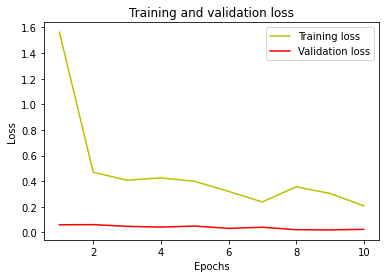

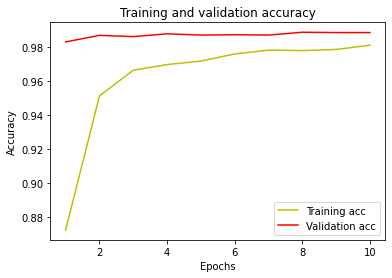

In [ ]:
if (os.path.exists('/content/drive/MyDrive/train_images/training_data_int_en.pkl')):
  training_data = load(open('/content/drive/MyDrive/train_images/training_data_int_en.pkl', 'rb'))


train = training_data
X_train = np.array([i[0] for i in train]).reshape(-1, 150, 150, 3)
y_train = [i[1] for i in train]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
y_train_one_hot = to_categorical(y_train1)
y_test_one_hot = to_categorical(y_test1)


tune_model = applications.vgg16.VGG16(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
model = Sequential()

for layer in tune_model.layers:
  model.add(layer)

for layer in model.layers:
  layer.trainable = False


model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))

model.summary()

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(X_train1, y_train_one_hot, epochs=10, validation_data = (X_test1, y_test_one_hot))
model.save("/content/drive/MyDrive/train_images/models/f_res_test2_model.h5")

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



load the model 

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/train_images/models/f_res_test2_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("/content/drive/MyDrive/train_images/models/converted_model.tflite", "wb").write(tflite_model)


In [ ]:
def start():
    TRAIN_DIR1 = '/content/drive/MyDrive/train_images/breakdancing'
    TRAIN_DIR2 = '/content/drive/MyDrive/train_images/calligraphy'
    TRAIN_DIR3 = '/content/drive/MyDrive/train_images/celebrating'
    TRAIN_DIR4 = '/content/drive/MyDrive/train_images/claypotterymaking'
    TRAIN_DIR5 = '/content/drive/MyDrive/train_images/climbingarope'
    TRAIN_DIR6 = '/content/drive/MyDrive/train_images/cookingoncampfire'
    TRAIN_DIR7 = '/content/drive/MyDrive/train_images/eatingicecream'
    TRAIN_DIR8 = '/content/drive/MyDrive/train_images/golfdriving'
    TRAIN_DIR9 = '/content/drive/MyDrive/train_images/pushup'
    TRAIN_DIR10 = '/content/drive/MyDrive/train_images/raisingeyebrows'
    TRAIN_DIR11 = '/content/drive/MyDrive/train_images/ridingscooter'
    TRAIN_DIR = []

    TRAIN_DIR.append(TRAIN_DIR1)
    TRAIN_DIR.append(TRAIN_DIR2)
    TRAIN_DIR.append(TRAIN_DIR3)
    TRAIN_DIR.append(TRAIN_DIR4)
    TRAIN_DIR.append(TRAIN_DIR5)
    TRAIN_DIR.append(TRAIN_DIR6)
    TRAIN_DIR.append(TRAIN_DIR7)
    TRAIN_DIR.append(TRAIN_DIR8)
    TRAIN_DIR.append(TRAIN_DIR9)
    TRAIN_DIR.append(TRAIN_DIR10)
    TRAIN_DIR.append(TRAIN_DIR11)

    TEST_DIR = '/content/drive/MyDrive/train_images'

    return TRAIN_DIR,TEST_DIR

def create_label(label_num):
    """ Create an one-hot encoded vector from label number """
    """
    # for kearas model
    if label_num == 0:
        return 0
    elif label_num == 1:
        return 1
    elif label_num == 2:
        return 2
    elif label_num == 3:
        return 3
    elif label_num == 4:
        return 4
    elif label_num == 5:
        return 5
    elif label_num == 6:
        return 6    

    #for tflearn model
    """
    if label_num == 0:
        return np.array([1, 0, 0, 0, 0, 0, 0,0,0,0,0])
    elif label_num == 1:
        return np.array([0, 1, 0, 0, 0, 0, 0,0,0,0,0])
    elif label_num == 2:
        return np.array([0, 0, 1, 0, 0, 0, 0,0,0,0,0])
    elif label_num == 3:
        return np.array([0, 0, 0, 1, 0, 0, 0,0,0,0,0])
    elif label_num == 4:
        return np.array([0, 0, 0, 0, 1, 0, 0,0,0,0,0])
    elif label_num == 5:
        return np.array([0, 0, 0, 0, 0, 1, 0,0,0,0,0])
    elif label_num == 6:
        return np.array([0, 0, 0, 0, 0, 0, 1,0,0,0,0])
    elif label_num == 7:
        return np.array([0, 0, 0, 0, 0, 0, 0,1,0,0,0])
    elif label_num == 8:
        return np.array([0, 0, 0, 0, 0, 0, 0,0,1,0,0])
    elif label_num == 9:
        return np.array([0, 0, 0, 0, 0, 0, 0,0,0,1,0])
    elif label_num == 10:
        return np.array([0, 0, 0, 0, 0, 0, 0,0,0,0,1])
    

def create_train_data(TRAIN_DIR,IMG_SIZE):
    training_data = []
    for i in range(len(TRAIN_DIR)):
        for img in tqdm(os.listdir(TRAIN_DIR[i])):
            path = os.path.join(TRAIN_DIR[i], img)
            img_data = cv2.imread(path,cv2.IMREAD_COLOR)#cv2.IMREAD_COLOR
            img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
            img_data = cv2.cvtColor(img_data,cv2.COLOR_RGB2BGR)
            training_data.append([np.array(img_data), create_label(i)])
    shuffle(training_data)
    dump(training_data, open('/content/drive/MyDrive/saves/training_data.pkl', 'wb'))
    return training_data

def create_test_data(TEST_DIR,IMG_SIZE):
    testing_data=[]
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_data = cv2.imread(path,cv2.IMREAD_COLOR)#
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        img_data = cv2.cvtColor(img_data, cv2.COLOR_RGB2BGR)
        testing_data.append([np.array(img_data)])

    dump(testing_data, open('/content/drive/MyDrive/saves/testing_data.pkl', 'wb'))
    return testing_data

def read(TRAIN_DIR,TEST_DIR,IMG_SIZE):
    if (os.path.exists('/content/drive/MyDrive/train_images/training_data.pkl')):  # If you have already created the dataset:
        training_data = load(open('/content/drive/MyDrive/train_images/training_data.pkl', 'rb'))
        # train_data = create_train_data()
    else:  # If dataset is not created:
        training_data = create_train_data(TRAIN_DIR,IMG_SIZE)

    if (os.path.exists('/content/drive/MyDrive/train_images/test.pkl')):
        testing_data = load(open('/content/drive/MyDrive/train_images/test.pkl', 'rb'))
        #print(np.shape(testing_data))
    else:
        testing_data = create_test_data(TEST_DIR,IMG_SIZE)

    train = training_data
    test = testing_data
    X_train = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    #print(np.shape(X_train))
    #X_train=X_train/255.0
    y_train = [i[1] for i in train]

    return X_train,y_train,test


#################################################################

def transfer_learn(X_train,y_train,IMG_SIZE):
    #tune_model = Xception(weights='imagenet',include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
    #vg=ks.applications.vgg16.VGG16()
    tune_model = applications.vgg16.VGG16(weights='imagenet', include_top=False,input_shape=(IMG_SIZE, IMG_SIZE, 3))
    model = Sequential()

    for layer in tune_model.layers:
        model.add(layer)

    for layer in model.layers:
        layer.trainable = False


    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7,activation='softmax'))

    model.summary()

    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

    X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
    y_train1 = to_categorical(y_train1)
    y_test1 = to_categorical(y_test1)
    history=model.fit(X_train1, y_train1, epochs=18, validation_data = (X_test1, y_test1))

    plt.plot(history.history['val_loss'], 'r')

    dump(model, open('vgg_model.pkl', 'wb'))
    """
    
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
    train_feature_ext = vgg_model.predict(X_train1)
    train_feature = train_feature_ext.reshape(train_feature_ext.shape[0], -1)

    dump(train_feature_ext, open('train_feature.pkl', 'wb'))
    # train_feature = load(open('train_feature.pkl', 'rb'))

    rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

    rf_model.fit(train_feature, y_train1)
    dump(rf_model, open('rf_model.pkl', 'wb'))
    # rf_model = load(open('rf_model.pkl', 'rb'))

    test_feature_ext = vgg_model.predict(X_test1)
    test_feature = test_feature_ext.reshape(test_feature_ext.shape[0], -1)
    dump(test_feature_ext, open('test_feature.pkl', 'wb'))

    pred_rf = rf_model.predict(test_feature)
    # le=preprocessing.LabelEncoder()
    # pred_rf=le.inverse_transform(pred_rf)
    print("acc = ", metrics.accuracy_score(y_test1, pred_rf))

    return rf_model,vgg_model
    """
    return model,history
########################################################

def data_augmentation(X_train):
    datagen_train = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=45,
        width_shift_range=0.2,  # randomly shift images horizontally
        height_shift_range=0.2,  # randomly shift images vertically
        vertical_flip=False,
        horizontal_flip=True)  # randomly flip images horizontally

    # fit augmented image generator on data
    datagen_train.fit(X_train)
    return datagen_train

#######################################################

def built_model(X_train,y_train,IMG_SIZE,MODEL_NAME,LR):
    ops.reset_default_graph()

    conv_input = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 3], name='input')

    conv1 = conv_2d(conv_input, 32, 5,regularizer='L1',weight_decay=0.0, activation='relu')
    pool1 = max_pool_2d(conv1, 5)

    conv2 = conv_2d(pool1, 64, 5, activation='relu')
    pool2 = max_pool_2d(conv2, 5)


    conv3 = conv_2d(pool2, 128, 5, activation='relu')
    pool3 = max_pool_2d(conv3, 5)


    conv4 = conv_2d(pool3, 64, 5, activation='relu')
    pool4 = max_pool_2d(conv4, 5)


    conv5 = conv_2d(pool4, 32, 5, activation='relu')
    pool5 = max_pool_2d(conv5, 5)


    fully_layer = fully_connected(pool5, 1024, activation='relu')
    fully_layer = dropout(fully_layer, 0.5)

    cnn_layers = fully_connected(fully_layer, 11, activation='softmax')
    cnn_layers = regression(cnn_layers, optimizer='Adam', learning_rate=LR, loss='categorical_crossentropy',
                            name='targets')
    model = tflearn.DNN(cnn_layers, tensorboard_dir='log', tensorboard_verbose=3)
    #model.load('rf_model.pkl',True)



    X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.90, random_state=42)

    if (os.path.exists('/content/drive/MyDrive/train_images/models/4model.tfl.meta')):
        model.load('/content/drive/MyDrive/train_images/models/model.tfl')

    else:
        early_stopping_cb = EarlyStoppingCallback(val_acc_thresh=0.95)
        #X_train1 = load(open('train_feature.pkl', 'rb'))
        #X_test1 = load(open('test_feature.pkl', 'rb'))

        model.fit({'input': X_train1}, {'targets': y_train1}, n_epoch=1,
                            validation_set=({'input': X_test1}, {'targets': y_test1}),
                            snapshot_step=200, show_metric=True, run_id=MODEL_NAME)
        

        
        model.save('/content/drive/MyDrive/train_images/models/model_nn.h5')
        #model.save('/content/drive/MyDrive/train_images/models/model.tfl')
        
        #plt.plot(history.history['val_loss'], 'r')
        #accuracy_score = model.evaluate(x=X_test1, y=y_test1)["accuracy"]
        #print('Accuracy: {0:f}'.format(accuracy_score))    
    return model

########################################################################

class EarlyStoppingCallback(tflearn.callbacks.Callback):
    def __init__(self, val_acc_thresh):
        """ Note: We are free to define our init function however we please. """
        self.val_acc_thresh = val_acc_thresh

    def on_epoch_end(self, training_state):
        """ """
        # Apparently this can happen.
        if training_state.val_acc is None: return
        if training_state.val_acc > self.val_acc_thresh:
            raise StopIteration

########################################################

###plot
def plot(history):

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.plot(epochs, acc, 'y', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

#######################################################################
def test_res(test,model,IMG_SIZE,TEST_DIR):
    test = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    #test = test / 255.0
    print(model)
    #test_feature_ext=vgg.predict(test)
    #test_feature=test_feature_ext.reshape(test_feature_ext.shape[0],-1)
    #pred_rf=model.predict(test_feature)
    # print(pred_rf)
    prediction = model.predict(test)

    header = ['Image', 'Label']
    arr = []
    c = 0

    with open('/content/drive/MyDrive/saves/submit.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)
        for img in tqdm(os.listdir(TEST_DIR)):
            word_label = img
            arr.append(word_label)

            index_max = np.argmax(prediction[c])

            if index_max == 0:
                arr.append('Acne')
            elif index_max == 1:
                arr.append('Hairloss')
            elif index_max == 2:
                arr.append('Nail Fungus')
            elif index_max == 3:
                arr.append('Normal')
            elif index_max == 4:
                arr.append('Skin Allergy')
            elif index_max == 5:
                arr.append('benign')
            elif index_max == 6:
                arr.append('malignant')

            writer.writerow(arr)
            arr = []
            c = c + 1


In [ ]:
!pip uninstall tb-nightly tensorboard tensorflow-estimator
!pip install tensorflow

In [ ]:
pip install tensorflow!tensorboard --logdir /path/to/logs --load_fast true

In [ ]:
    

    %load_ext tensorboard
    %tensorboard --logdir '/content/drive/MyDrive/train_images/models'

In [ ]:
TRAIN_DIR,TEST_DIR=start()
X_train,y_train,test=read(TRAIN_DIR,TEST_DIR,150)
#vgg_model,history=transfer_learn(X_train,y_train,150)
model=built_model(X_train,y_train,150,'CI_Project_cnn',0.001)
#plot(history)
test_res(test,model,150,TEST_DIR)


Training Step: 42  | total loss: 2.00156 | time: 111.121s
| Adam | epoch: 001 | loss: 2.00156 - acc: 0.2373 -- iter: 2688/2720
Training Step: 43  | total loss: 1.98669 | time: 120.971s
| Adam | epoch: 001 | loss: 1.98669 - acc: 0.2313 | val_loss: 1.77809 - val_acc: 0.2647 -- iter: 2720/2720
--
INFO:tensorflow:/content/drive/MyDrive/train_images/models/model_nn.h5 is not in all_model_checkpoint_paths. Manually adding it.


FileNotFoundError: ignored